🚀 Ejecutando paso 1...
✅ Librerías cargadas correctamente
✅ Paso 1 completado
🚀 Ejecutando paso 2...
📂 Cargando datos...
   Shape inicial: (9564, 49)
   Columnas: 49

📊 Primeras filas:


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436


✅ Paso 2 completado
🚀 Ejecutando paso 3...
🎯 Analizando variable target...

Distribución original de 'koi_disposition':
koi_disposition
CANDIDATE         1979
CONFIRMED         2746
FALSE POSITIVE    4839
Name: count, dtype: int64

⚠️  Eliminadas 1979 filas con clases no válidas

🔵 Clasificación BINARIA detectada

Mapeo de clases: {'CONFIRMED': 0, 'FALSE POSITIVE': 1}

Distribución final:
koi_disposition
0    2746
1    4839
Name: count, dtype: int64
✅ Paso 3 completado
🚀 Ejecutando paso 4...
🔍 Identificando tipos de features...
   🏷️  'koi_teq_err1' → Categórica (flag binario)
   🏷️  'koi_teq_err2' → Categórica (flag binario)

📊 Resumen:
   ✓ Numéricas: 35
   ✓ Categóricas: 2
   ✓ IDs excluidas: 12

   Categóricas detectadas: ['koi_teq_err1', 'koi_teq_err2']
✅ Paso 4 completado
🚀 Ejecutando paso 5...
🧹 Analizando valores faltantes...

📊 Top 10 columnas con más nulos:
   • koi_teq_err2: 100.00%
   • koi_teq_err1: 100.00%
   • koi_steff_err2: 4.92%
   • koi_srad_err2: 4.72%
   • koi_stef

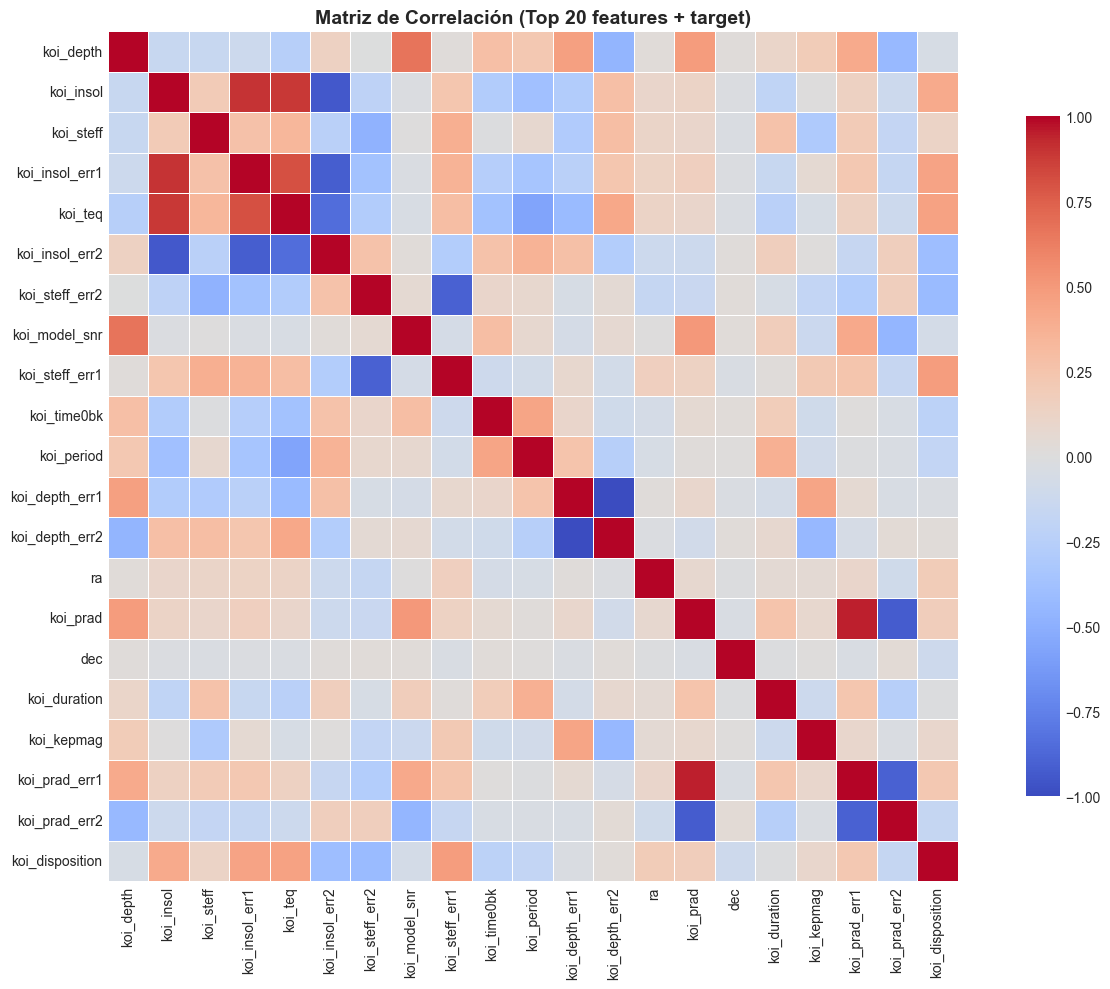

✅ Paso 8 completado
🚀 Ejecutando paso 9...
ℹ️  No hay features categóricas
✅ Paso 9 completado
🚀 Ejecutando paso 10...
📊 Generando visualizaciones...


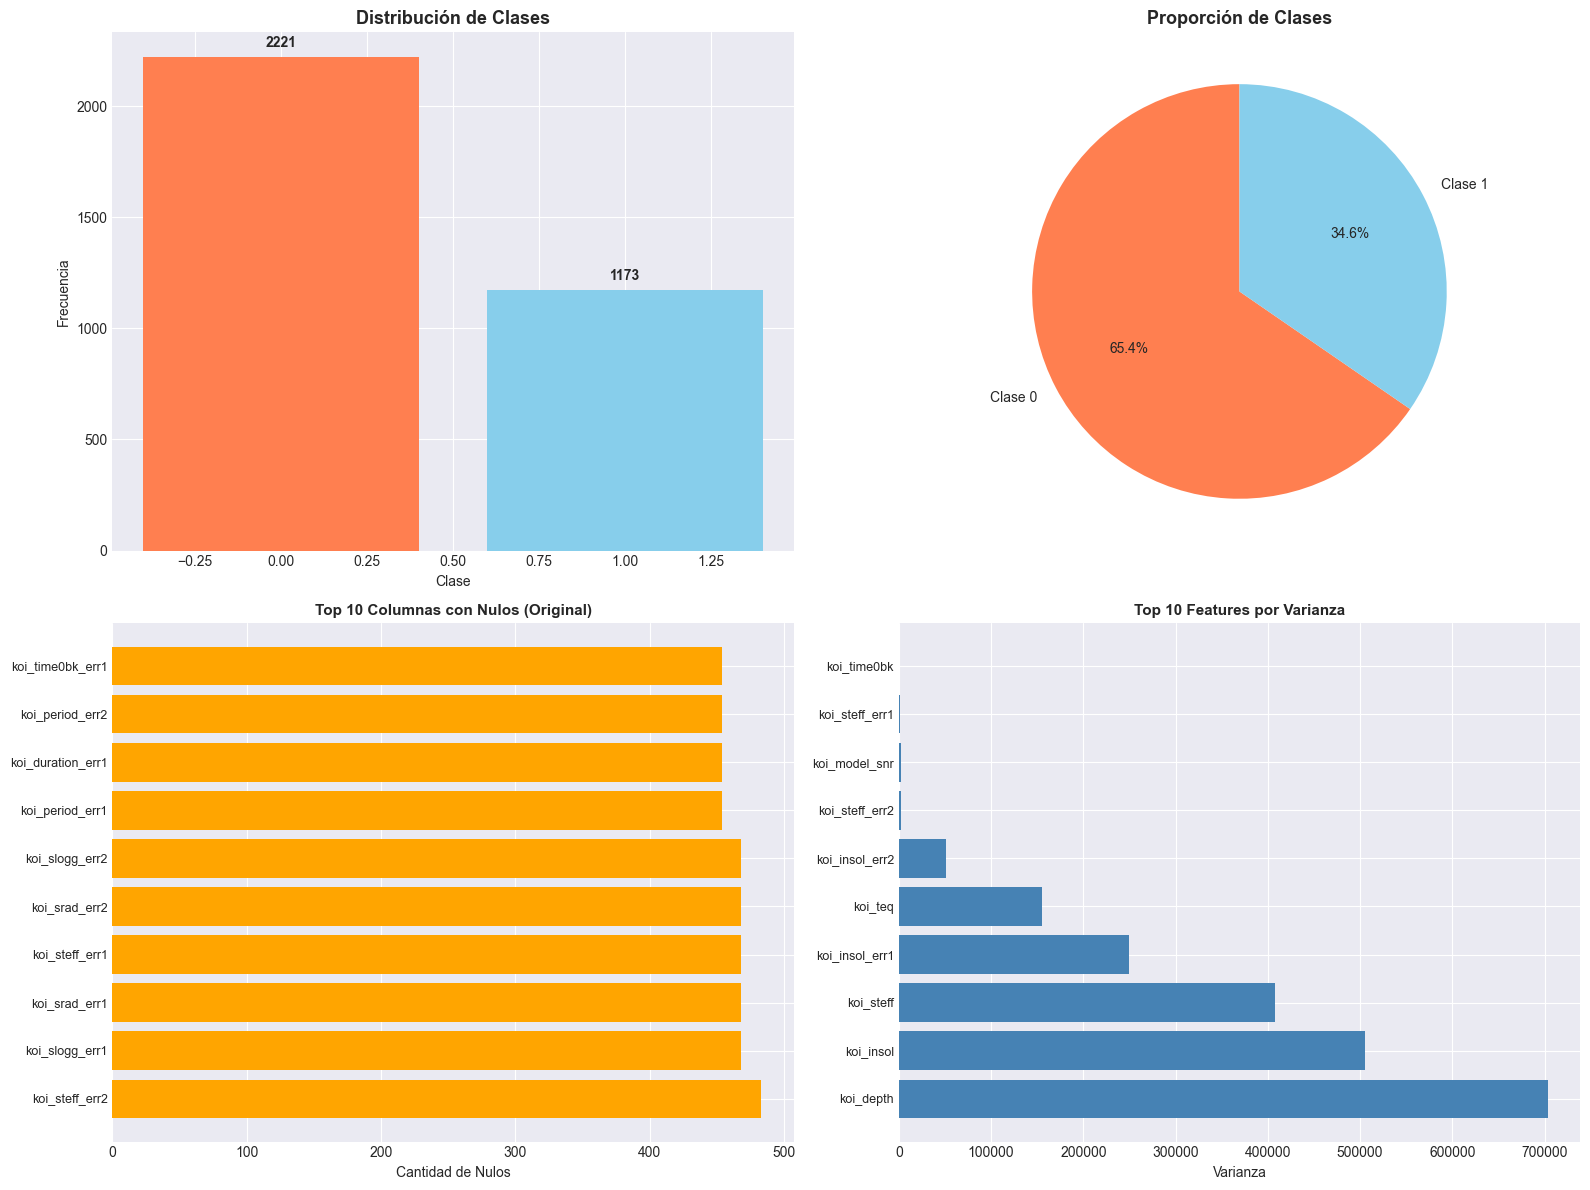

✓ Visualizaciones completadas
✅ Paso 10 completado
🚀 Ejecutando paso 11...
📊 Dataset final antes del split:
   Shape: (3394, 35)
   Features: 35 (35 num + 0 cat)

✓ Split realizado:
   Train: 2715 muestras (80.0%)
   Val:   679 muestras (20.0%)

   Distribución en Train:
   • Clase 0: 1777 (65.5%)
   • Clase 1: 938 (34.5%)
✅ Paso 11 completado
🚀 Ejecutando paso 12...
⚖️  Balanceando datos (método: smote)...
   Antes: {0: 1777, 1: 938}
   • Usando SMOTE estándar
   Después: {0: 1777, 1: 1777}
   Shape final: (3554, 35)
✅ Paso 12 completado
🚀 Ejecutando paso 13...
📊 Scale pos weight: 1.000

🎯 Configuración del modelo:
   Tipo: Clasificación Binaria
   Objective: binary:logistic
   Eval metric: aucpr
   Max rounds: 2000
   Early stopping: 100
✅ Paso 13 completado
🚀 Ejecutando paso 14...
🚀 Entrenando modelo XGBoost...
[0]	train-aucpr:0.94372	valid-aucpr:0.88976
[100]	train-aucpr:0.98787	valid-aucpr:0.95497
[200]	train-aucpr:0.99456	valid-aucpr:0.96285
[300]	train-aucpr:0.99767	valid-aucpr:

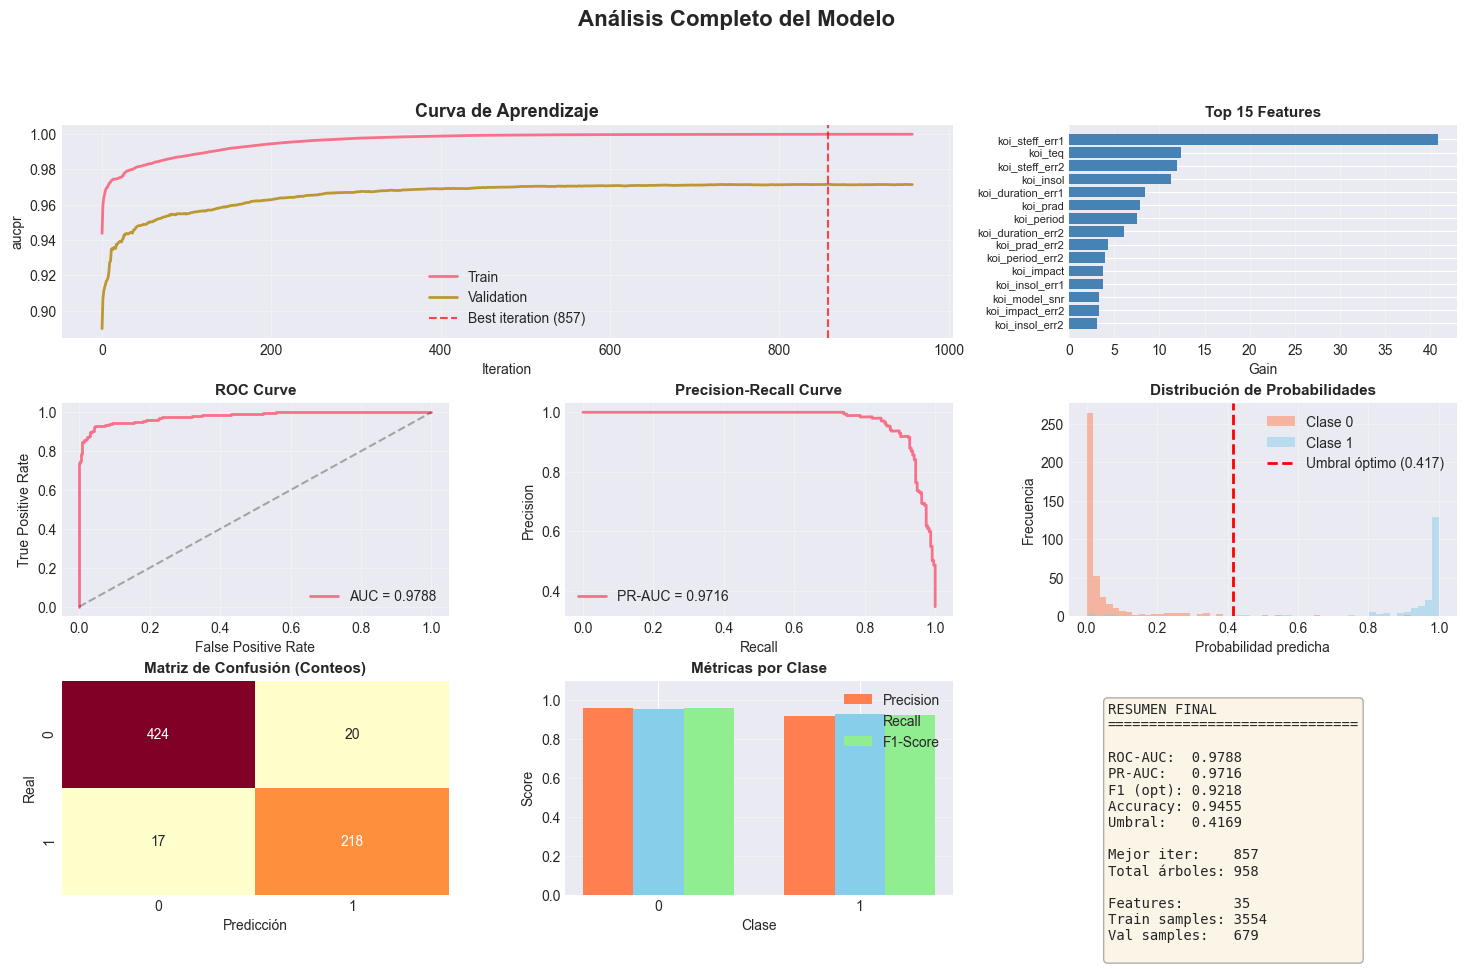

✅ Visualizaciones completadas
✅ Paso 16 completado
🎉 Pipeline completado exitosamente!


In [ ]:
# ============================================================================
# CONFIGURACIÓN GLOBAL Y ESTADO DEL PIPELINE
# ============================================================================
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, accuracy_score, 
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, make_scorer
)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# ESTADO GLOBAL DEL PIPELINE
# ============================================================================
pipeline_state = {
    'current_step': 0,
    'steps_config': {},
    'steps_results': {},
    'execution_chain': []
}

# ============================================================================
# FUNCIONES DE EJECUCIÓN DEL PIPELINE
# ============================================================================
def reset_pipeline_from_step(step_number):
    """Reinicia el pipeline desde un paso específico"""
    global pipeline_state
    
    # Mantener configuraciones hasta el paso anterior
    new_steps_config = {}
    new_steps_results = {}
    
    for step in pipeline_state['steps_config']:
        if step < step_number:
            new_steps_config[step] = pipeline_state['steps_config'][step]
            new_steps_results[step] = pipeline_state['steps_results'][step]
    
    pipeline_state.update({
        'current_step': step_number,
        'steps_config': new_steps_config,
        'steps_results': new_steps_results,
        'execution_chain': [s for s in pipeline_state['execution_chain'] if s < step_number]
    })
    
    print(f"🔄 Pipeline reiniciado desde paso {step_number}")

def should_execute_step(step_number, config):
    """Determina si un paso debe ejecutarse basado en cambios de configuración"""
    if step_number not in pipeline_state['steps_config']:
        return True
    
    old_config = pipeline_state['steps_config'][step_number]
    return old_config != config

def execute_step(step_number, step_function, config, force_execution=False):
    """Ejecuta un paso del pipeline si es necesario"""
    global pipeline_state
    
    # Verificar si debemos ejecutar este paso
    if not force_execution and not should_execute_step(step_number, config):
        print(f"⏭️  Paso {step_number} ya ejecutado con la misma configuración")
        return pipeline_state['steps_results'][step_number]
    
    # Reiniciar pasos posteriores si estamos reconfigurando
    if step_number in pipeline_state['steps_config']:
        reset_pipeline_from_step(step_number)
    
    # Ejecutar el paso
    print(f"🚀 Ejecutando paso {step_number}...")
    result = step_function(config)
    
    # Actualizar estado global
    pipeline_state['steps_config'][step_number] = config
    pipeline_state['steps_results'][step_number] = result
    pipeline_state['current_step'] = step_number
    pipeline_state['execution_chain'].append(step_number)
    
    # Actualizar variables globales del paso actual
    for key, value in result.items():
        pipeline_state[key] = value
    
    print(f"✅ Paso {step_number} completado")
    return result

# ============================================================================
# PASO 1: IMPORTS Y SETUP
# ============================================================================
def step_1_imports_setup(config):
    """Paso 1: Importar librerías y configuración inicial"""
    print("✅ Librerías cargadas correctamente")
    return {'step_1_completed': True}

# ============================================================================
# PASO 2: CARGA DE DATOS
# ============================================================================
def step_2_load_data(config):
    """Paso 2: Cargar datos desde CSV"""
    CSV_PATH = config['csv_path']
    TARGET_COL = config['target_col']
    RANDOM_STATE = config['random_state']
    
    print("📂 Cargando datos...")
    df_raw = pd.read_csv(CSV_PATH, comment='#')
    print(f"   Shape inicial: {df_raw.shape}")
    print(f"   Columnas: {df_raw.shape[1]}")
    print(f"\n📊 Primeras filas:")
    display(df_raw.head(3))
    
    return {
        'df_raw': df_raw,
        'target_col': TARGET_COL,
        'random_state': RANDOM_STATE,
        'step_2_completed': True
    }

# ============================================================================
# PASO 3: ANÁLISIS Y LIMPIEZA DE TARGET
# ============================================================================
def step_3_analyze_target(config):
    """Paso 3: Analizar y preparar variable target"""
    VALID_CLASSES = config['valid_classes']
    
    # Recuperar datos del estado anterior
    df_raw = pipeline_state['df_raw']
    TARGET_COL = pipeline_state['target_col']
    
    print("🎯 Analizando variable target...")
    print(f"\nDistribución original de '{TARGET_COL}':")
    print(df_raw[TARGET_COL].value_counts().sort_index())
    
    # Filtrar clases válidas
    df = df_raw[df_raw[TARGET_COL].isin(VALID_CLASSES)].copy()
    removed = len(df_raw) - len(df)
    print(f"\n⚠️  Eliminadas {removed} filas con clases no válidas")
    
    # Detectar tipo de clasificación
    n_classes = len(VALID_CLASSES)
    is_binary = n_classes == 2
    
    if is_binary:
        print("\n🔵 Clasificación BINARIA detectada")
        class_mapping = {VALID_CLASSES[0]: 0, VALID_CLASSES[1]: 1}
        df[TARGET_COL] = df[TARGET_COL].map(class_mapping).astype(int)
    else:
        print(f"\n🟢 Clasificación MULTICLASE detectada ({n_classes} clases)")
        le = LabelEncoder()
        df[TARGET_COL] = le.fit_transform(df[TARGET_COL])
        class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"\nMapeo de clases: {class_mapping}")
    print(f"\nDistribución final:")
    print(df[TARGET_COL].value_counts().sort_index())
    
    result = {
        'df': df,
        'is_binary': is_binary,
        'n_classes': n_classes,
        'class_mapping': class_mapping,
        'step_3_completed': True
    }
    
    if not is_binary:
        result['label_encoder'] = le
    
    return result

# ============================================================================
# PASO 4: IDENTIFICACIÓN AUTOMÁTICA DE TIPOS DE FEATURES
# ============================================================================
def step_4_identify_features(config):
    """Paso 4: Identificar tipos de features automáticamente"""
    ID_PATTERNS = config['id_patterns']
    CATEGORICAL_THRESHOLD = config['categorical_threshold']
    
    df = pipeline_state['df']
    TARGET_COL = pipeline_state['target_col']
    
    print("🔍 Identificando tipos de features...")
    
    # 1. Identificar columnas ID
    id_cols = [c for c in df.columns 
               if any(p in c.lower() for p in ID_PATTERNS)]
    
    # 2. Excluir target e IDs
    feature_cols = [c for c in df.columns 
                    if c != TARGET_COL and c not in id_cols]
    
    # 3. Clasificar numéricas vs categóricas
    numeric_cols = []
    categorical_cols = []
    
    for col in feature_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            nunique = df[col].nunique()
            
            if nunique <= CATEGORICAL_THRESHOLD:
                unique_vals = set(df[col].dropna().unique())
                
                if unique_vals.issubset({0, 1, 0.0, 1.0}):
                    categorical_cols.append(col)
                    print(f"   🏷️  '{col}' → Categórica (flag binario)")
                else:
                    if df[col].dtype in ['int64', 'int32']:
                        categorical_cols.append(col)
                        print(f"   🏷️  '{col}' → Categórica ({nunique} valores discretos)")
                    else:
                        numeric_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    
    print(f"\n📊 Resumen:")
    print(f"   ✓ Numéricas: {len(numeric_cols)}")
    print(f"   ✓ Categóricas: {len(categorical_cols)}")
    print(f"   ✓ IDs excluidas: {len(id_cols)}")
    
    if categorical_cols:
        print(f"\n   Categóricas detectadas: {categorical_cols[:5]}{'...' if len(categorical_cols) > 5 else ''}")
    
    return {
        'numeric_cols': numeric_cols,
        'categorical_cols': categorical_cols,
        'id_cols': id_cols,
        'feature_cols': feature_cols,
        'step_4_completed': True
    }

# ============================================================================
# PASO 5: MANEJO DE VALORES FALTANTES
# ============================================================================
def step_5_handle_missing(config):
    """Paso 5: Manejar valores faltantes"""
    HIGH_NULL_THRESHOLD = config['high_null_threshold']
    NUMERIC_IMPUTE = config['numeric_impute']
    CATEGORICAL_IMPUTE = config['categorical_impute']
    
    df = pipeline_state['df'].copy()
    numeric_cols = pipeline_state['numeric_cols']
    categorical_cols = pipeline_state['categorical_cols']
    feature_cols = pipeline_state['feature_cols']
    
    print("🧹 Analizando valores faltantes...")
    
    # Calcular % de nulos
    null_info = df[feature_cols].isna().sum()
    null_pct = (null_info / len(df) * 100).round(2)
    
    print("\n📊 Top 10 columnas con más nulos:")
    top_nulls = null_pct[null_pct > 0].sort_values(ascending=False).head(10)
    for col, pct in top_nulls.items():
        print(f"   • {col}: {pct:.2f}%")
    
    # Identificar columnas a eliminar
    high_null_cols = null_pct[null_pct > HIGH_NULL_THRESHOLD * 100].index.tolist()
    if high_null_cols:
        print(f"\n⚠️  Eliminando {len(high_null_cols)} columnas con >{HIGH_NULL_THRESHOLD*100:.0f}% nulos:")
        for col in high_null_cols:
            print(f"   • {col} ({null_pct[col]:.2f}%)")
        
        df = df.drop(columns=high_null_cols)
        
        # Actualizar listas de features
        numeric_cols = [c for c in numeric_cols if c not in high_null_cols]
        categorical_cols = [c for c in categorical_cols if c not in high_null_cols]
        feature_cols = [c for c in feature_cols if c not in high_null_cols]
    
    # Imputar valores faltantes en columnas restantes
    print(f"\n🔧 Imputando valores faltantes...")
    
    # Numéricas
    for col in numeric_cols:
        if df[col].isna().sum() > 0:
            if NUMERIC_IMPUTE == 'median':
                fill_value = df[col].median()
            elif NUMERIC_IMPUTE == 'mean':
                fill_value = df[col].mean()
            else:  # most_frequent
                fill_value = df[col].mode()[0]
            
            df[col].fillna(fill_value, inplace=True)
    
    # Categóricas
    for col in categorical_cols:
        if df[col].isna().sum() > 0:
            if CATEGORICAL_IMPUTE == 'missing':
                df[col].fillna('missing', inplace=True)
            else:  # most_frequent
                df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Verificar
    remaining_nulls = df[feature_cols].isna().sum().sum()
    print(f"   ✓ Nulos restantes: {remaining_nulls}")
    
    return {
        'df': df,
        'numeric_cols': numeric_cols,
        'categorical_cols': categorical_cols,
        'feature_cols': feature_cols,
        'step_5_completed': True
    }

# ============================================================================
# PASO 6: ELIMINACIÓN DE DUPLICADOS
# ============================================================================
def step_6_remove_duplicates(config):
    """Paso 6: Eliminar duplicados"""
    df = pipeline_state['df'].copy()
    
    print("🔄 Verificando duplicados...")
    dup_count = df.duplicated().sum()
    
    if dup_count > 0:
        print(f"⚠️  Eliminando {dup_count} filas duplicadas")
        df = df.drop_duplicates()
        print(f"   Shape después: {df.shape}")
    else:
        print("✓ No se encontraron duplicados")
    
    return {
        'df': df,
        'step_6_completed': True
    }

# ============================================================================
# PASO 7: DETECCIÓN Y ELIMINACIÓN DE OUTLIERS
# ============================================================================
def step_7_remove_outliers(config):
    """Paso 7: Detectar y eliminar outliers"""
    REMOVE_OUTLIERS = config['remove_outliers']
    OUTLIER_METHOD = config['outlier_method']
    OUTLIER_THRESHOLD = config['outlier_threshold']
    
    df = pipeline_state['df'].copy()
    numeric_cols = pipeline_state['numeric_cols']
    
    if REMOVE_OUTLIERS:
        print(f"🔎 Detectando outliers (método: {OUTLIER_METHOD})...")
        
        initial_rows = len(df)
        mask = pd.Series(True, index=df.index)
        outlier_counts = {}
        
        for col in numeric_cols:
            if OUTLIER_METHOD == "iqr":
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - OUTLIER_THRESHOLD * IQR
                upper = Q3 + OUTLIER_THRESHOLD * IQR
                col_mask = (df[col] >= lower) & (df[col] <= upper)
            
            elif OUTLIER_METHOD == "zscore":
                z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
                col_mask = z_scores <= OUTLIER_THRESHOLD
            
            outliers = (~col_mask).sum()
            if outliers > 0:
                outlier_counts[col] = outliers
            
            mask &= col_mask
        
        df = df[mask].copy()
        removed = initial_rows - len(df)
        removed_pct = (removed / initial_rows * 100)
        
        print(f"\n   ✓ Eliminadas {removed} filas ({removed_pct:.2f}%)")
        
        if outlier_counts:
            print(f"\n   Top 5 columnas con más outliers:")
            for col, count in sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
                print(f"   • {col}: {count} outliers")
        
        return {
            'df': df,
            'step_7_completed': True
        }
    else:
        print("⏭️  Omitiendo detección de outliers")
        return {'step_7_completed': True}

# ============================================================================
# PASO 8: ANÁLISIS DE CORRELACIÓN Y SELECCIÓN DE FEATURES
# ============================================================================
def step_8_feature_selection(config):
    """Paso 8: Análisis de correlación y selección de features"""
    MIN_TARGET_CORRELATION = config['min_target_correlation']
    MAX_FEATURE_CORRELATION = config['max_feature_correlation']
    SHOW_CORRELATION_PLOT = config['show_correlation_plot']
    
    df = pipeline_state['df']
    numeric_cols = pipeline_state['numeric_cols']
    TARGET_COL = pipeline_state['target_col']
    
    print("📊 Analizando correlaciones...")
    
    # Preparar datos numéricos
    df_corr = df[numeric_cols + [TARGET_COL]].copy()
    
    # Correlación con target
    target_corr = df_corr.corr()[TARGET_COL].drop(TARGET_COL).abs().sort_values(ascending=False)
    
    print(f"\n🎯 Top 10 features más correlacionadas con target:")
    for feat, corr in target_corr.head(10).items():
        print(f"   • {feat}: {corr:.4f}")
    
    # Filtrar por correlación mínima
    weak_features = target_corr[target_corr < MIN_TARGET_CORRELATION].index.tolist()
    if weak_features:
        print(f"\n⚠️  {len(weak_features)} features con correlación < {MIN_TARGET_CORRELATION}:")
        print(f"   {weak_features[:5]}{'...' if len(weak_features) > 5 else ''}")
        # Nota: La eliminación se puede implementar aquí si se desea
    
    # Detectar multicolinealidad
    print(f"\n🔗 Detectando multicolinealidad (umbral: {MAX_FEATURE_CORRELATION})...")
    corr_matrix = df_corr[numeric_cols].corr().abs()
    
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > MAX_FEATURE_CORRELATION:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print(f"   ⚠️  {len(high_corr_pairs)} pares con alta correlación:")
        for feat1, feat2, corr in high_corr_pairs[:5]:
            print(f"   • {feat1} ↔ {feat2}: {corr:.4f}")
    
    # Visualización
    if SHOW_CORRELATION_PLOT and len(numeric_cols) > 2:
        print("\n📈 Generando matriz de correlación...")
        
        top_n = min(20, len(numeric_cols))
        variances = df[numeric_cols].var().sort_values(ascending=False)
        top_features = variances.head(top_n).index.tolist()
        
        plt.figure(figsize=(14, 10))
        corr_subset = df[top_features + [TARGET_COL]].corr()
        
        sns.heatmap(corr_subset, annot=False, cmap='coolwarm', center=0,
                    square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
        plt.title(f"Matriz de Correlación (Top {top_n} features + target)", 
                  fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    return {
        'numeric_cols': numeric_cols,
        'target_correlation': target_corr.to_dict(),
        'step_8_completed': True
    }

# ============================================================================
# PASO 9: PREPARACIÓN DE FEATURES CATEGÓRICAS
# ============================================================================
def step_9_prepare_categoricals(config):
    """Paso 9: Preparar features categóricas"""
    ENABLE_CATEGORICAL = config['enable_categorical']
    
    df = pipeline_state['df'].copy()
    categorical_cols = pipeline_state['categorical_cols']
    
    if categorical_cols and ENABLE_CATEGORICAL:
        print(f"🏷️  Preparando {len(categorical_cols)} features categóricas...")
        
        for col in categorical_cols:
            df[col] = df[col].astype('category')
            print(f"   • {col}: {df[col].nunique()} categorías únicas")
        
        print(f"\n✓ Categóricas convertidas a tipo 'category'")
        enable_categorical = True
    elif categorical_cols:
        print(f"⚠️  {len(categorical_cols)} categóricas detectadas pero ENABLE_CATEGORICAL=False")
        print("   Se convertirán a códigos numéricos automáticamente")
        enable_categorical = False
    else:
        print("ℹ️  No hay features categóricas")
        enable_categorical = False
    
    return {
        'df': df,
        'enable_categorical': enable_categorical,
        'step_9_completed': True
    }

# ============================================================================
# PASO 10: VISUALIZACIONES EXPLORATORIAS
# ============================================================================
def step_10_exploratory_visualizations(config):
    """Paso 10: Visualizaciones exploratorias"""
    df = pipeline_state['df']
    TARGET_COL = pipeline_state['target_col']
    numeric_cols = pipeline_state['numeric_cols']
    feature_cols = pipeline_state['feature_cols']
    
    print("📊 Generando visualizaciones...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Distribución del target
    target_counts = df[TARGET_COL].value_counts().sort_index()
    axes[0, 0].bar(target_counts.index, target_counts.values, 
                   color=['coral', 'skyblue', 'lightgreen'][:len(target_counts)])
    axes[0, 0].set_title("Distribución de Clases", fontsize=13, fontweight='bold')
    axes[0, 0].set_xlabel("Clase")
    axes[0, 0].set_ylabel("Frecuencia")
    for i, v in enumerate(target_counts.values):
        axes[0, 0].text(i, v + max(target_counts.values)*0.02, str(v), ha='center', fontweight='bold')
    
    # 2. Balance de clases (%)
    target_pct = (target_counts / target_counts.sum() * 100).round(1)
    axes[0, 1].pie(target_pct, labels=[f"Clase {i}" for i in target_pct.index], 
                   autopct='%1.1f%%', startangle=90, colors=['coral', 'skyblue', 'lightgreen'][:len(target_pct)])
    axes[0, 1].set_title("Proporción de Clases", fontsize=13, fontweight='bold')
    
    # 3. Distribución de nulos (antes de limpieza)
    if 'df_raw' in pipeline_state:
        null_before = pipeline_state['df_raw'][feature_cols].isna().sum().sort_values(ascending=False).head(10)
        if null_before.sum() > 0:
            axes[1, 0].barh(range(len(null_before)), null_before.values, color='orange')
            axes[1, 0].set_yticks(range(len(null_before)))
            axes[1, 0].set_yticklabels(null_before.index, fontsize=9)
            axes[1, 0].set_xlabel("Cantidad de Nulos")
            axes[1, 0].set_title("Top 10 Columnas con Nulos (Original)", fontsize=11, fontweight='bold')
        else:
            axes[1, 0].text(0.5, 0.5, "Sin nulos", ha='center', va='center', fontsize=14)
            axes[1, 0].axis('off')
    
    # 4. Importancia por varianza (top 10 numéricas)
    if len(numeric_cols) > 0:
        top_var = df[numeric_cols].var().sort_values(ascending=False).head(10)
        axes[1, 1].barh(range(len(top_var)), top_var.values, color='steelblue')
        axes[1, 1].set_yticks(range(len(top_var)))
        axes[1, 1].set_yticklabels(top_var.index, fontsize=9)
        axes[1, 1].set_xlabel("Varianza")
        axes[1, 1].set_title("Top 10 Features por Varianza", fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Visualizaciones completadas")
    return {'step_10_completed': True}

# ============================================================================
# PASO 11: SPLIT TRAIN/VALIDATION
# ============================================================================
def step_11_train_val_split(config):
    """Paso 11: Split en train/validation"""
    TEST_SIZE = config['test_size']
    STRATIFY = config['stratify']
    
    df = pipeline_state['df']
    TARGET_COL = pipeline_state['target_col']
    numeric_cols = pipeline_state['numeric_cols']
    categorical_cols = pipeline_state['categorical_cols']
    RANDOM_STATE = pipeline_state['random_state']
    
    # Preparar X e y
    all_features = numeric_cols + categorical_cols
    X = df[all_features].copy()
    y = df[TARGET_COL].copy()
    
    print(f"📊 Dataset final antes del split:")
    print(f"   Shape: {X.shape}")
    print(f"   Features: {len(all_features)} ({len(numeric_cols)} num + {len(categorical_cols)} cat)")
    
    # Split
    stratify_param = y if STRATIFY else None
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=TEST_SIZE,
        stratify=stratify_param,
        random_state=RANDOM_STATE
    )
    
    print(f"\n✓ Split realizado:")
    print(f"   Train: {X_train.shape[0]} muestras ({(len(y_train)/len(y)*100):.1f}%)")
    print(f"   Val:   {X_val.shape[0]} muestras ({(len(y_val)/len(y)*100):.1f}%)")
    print(f"\n   Distribución en Train:")
    for cls, count in y_train.value_counts().sort_index().items():
        print(f"   • Clase {cls}: {count} ({count/len(y_train)*100:.1f}%)")
    
    return {
        'X_train': X_train,
        'X_val': X_val,
        'y_train': y_train,
        'y_val': y_val,
        'all_features': all_features,
        'step_11_completed': True
    }

# ============================================================================
# PASO 12: BALANCEO DE CLASES
# ============================================================================
def step_12_balance_data(config):
    """Paso 12: Balancear clases"""
    BALANCE_METHOD = config['balance_method']
    SMOTE_K_NEIGHBORS = config['smote_k_neighbors']
    SMOTE_SAMPLING_STRATEGY = config['smote_sampling_strategy']
    
    X_train = pipeline_state['X_train']
    y_train = pipeline_state['y_train']
    categorical_cols = pipeline_state['categorical_cols']
    all_features = pipeline_state['all_features']
    RANDOM_STATE = pipeline_state['random_state']
    
    if BALANCE_METHOD is not None:
        print(f"⚖️  Balanceando datos (método: {BALANCE_METHOD})...")
        
        initial_counts = Counter(y_train)
        print(f"   Antes: {dict(initial_counts)}")
        
        # Detectar si hay categóricas
        cat_in_features = [c for c in categorical_cols if c in all_features]
        has_categoricals = len(cat_in_features) > 0
        
        # Preparar datos para balanceo
        X_train_work = X_train.copy()
        cat_mappings = {}
        
        # Convertir categóricas a códigos numéricos temporalmente
        if has_categoricals:
            all_cols = X_train.columns.tolist()
            categorical_indices = [all_cols.index(c) for c in cat_in_features]
            
            for col in cat_in_features:
                X_train_work[col] = X_train_work[col].astype('category')
                cat_mappings[col] = X_train_work[col].cat.categories.tolist()
                X_train_work[col] = X_train_work[col].cat.codes
        
        X_array = X_train_work.values
        
        # Aplicar balanceo
        try:
            # Ajustar k_neighbors si hay pocas muestras de clase minoritaria
            min_class_samples = min(initial_counts.values())
            k_neighbors_adjusted = min(SMOTE_K_NEIGHBORS, min_class_samples - 1)
            
            if BALANCE_METHOD == "smote":
                if has_categoricals:
                    sampler = SMOTENC(
                        categorical_features=categorical_indices,
                        sampling_strategy=SMOTE_SAMPLING_STRATEGY,
                        k_neighbors=k_neighbors_adjusted,
                        random_state=RANDOM_STATE
                    )
                    print(f"   • Usando SMOTENC (categóricas detectadas)")
                else:
                    sampler = SMOTE(
                        sampling_strategy=SMOTE_SAMPLING_STRATEGY,
                        k_neighbors=k_neighbors_adjusted,
                        random_state=RANDOM_STATE
                    )
                    print(f"   • Usando SMOTE estándar")
                
                X_balanced, y_balanced = sampler.fit_resample(X_array, y_train)
            
            elif BALANCE_METHOD == "undersample":
                sampler = RandomUnderSampler(
                    sampling_strategy='auto',
                    random_state=RANDOM_STATE
                )
                X_balanced, y_balanced = sampler.fit_resample(X_array, y_train)
            
            elif BALANCE_METHOD == "hybrid":
                # Over + Under
                if has_categoricals:
                    oversample = SMOTENC(
                        categorical_features=categorical_indices,
                        sampling_strategy=0.5,
                        k_neighbors=k_neighbors_adjusted,
                        random_state=RANDOM_STATE
                    )
                else:
                    oversample = SMOTE(
                        sampling_strategy=0.5,
                        k_neighbors=k_neighbors_adjusted,
                        random_state=RANDOM_STATE
                    )
                
                undersample = RandomUnderSampler(
                    sampling_strategy=0.8,
                    random_state=RANDOM_STATE
                )
                pipe = ImbPipeline([('o', oversample), ('u', undersample)])
                X_balanced, y_balanced = pipe.fit_resample(X_array, y_train)
            
            # Reconstruir DataFrame
            X_train_balanced = pd.DataFrame(X_balanced, columns=all_features)
            y_train_balanced = pd.Series(y_balanced, name='target')
            
            # Restaurar categóricas
            if has_categoricals:
                for col in cat_in_features:
                    # Redondear y clipear códigos generados por SMOTE
                    X_train_balanced[col] = X_train_balanced[col].round().astype(int)
                    max_code = len(cat_mappings[col]) - 1
                    X_train_balanced[col] = X_train_balanced[col].clip(0, max_code)
                    
                    # Mapear de vuelta a categorías
                    X_train_balanced[col] = X_train_balanced[col].apply(
                        lambda x: cat_mappings[col][x] if 0 <= x <= max_code else cat_mappings[col][0]
                    )
                    X_train_balanced[col] = X_train_balanced[col].astype('category')
            
            final_counts = Counter(y_train_balanced)
            print(f"   Después: {dict(final_counts)}")
            print(f"   Shape final: {X_train_balanced.shape}")
            
            # Actualizar datos de entrenamiento
            return {
                'X_train': X_train_balanced,
                'y_train': y_train_balanced,
                'step_12_completed': True
            }
        
        except Exception as e:
            print(f"   ⚠️  Balanceo falló: {e}")
            print(f"   Usando datos originales sin balancear")
            return {'step_12_completed': True}
    else:
        print("⏭️  Sin balanceo de datos")
        return {'step_12_completed': True}

# ============================================================================
# PASO 13: CONFIGURACIÓN DEL MODELO XGBOOST
# ============================================================================
def step_13_configure_model(config):
    """Paso 13: Configurar modelo XGBoost"""
    # Detectar objective automáticamente
    is_binary = pipeline_state['is_binary']
    n_classes = pipeline_state['n_classes']
    RANDOM_STATE = pipeline_state['random_state']
    
    if is_binary:
        OBJECTIVE = "binary:logistic"
        EVAL_METRIC = "aucpr"
    else:
        OBJECTIVE = "multi:softprob"
        EVAL_METRIC = "mlogloss"
    
    # Hiperparámetros principales
    XGB_PARAMS = {
        "objective": OBJECTIVE,
        "eval_metric": EVAL_METRIC,
        "eta": config['eta'],
        "max_depth": config['max_depth'],
        "subsample": config['subsample'],
        "colsample_bytree": config['colsample_bytree'],
        "lambda": config['lambda'],
        "alpha": config['alpha'],
        "min_child_weight": config['min_child_weight'],
        "gamma": config['gamma'],
        "tree_method": config['tree_method'],
        "seed": RANDOM_STATE
    }
    
    # Si es multiclase, agregar num_class
    if not is_binary:
        XGB_PARAMS['num_class'] = n_classes
    
    # Configuración de entrenamiento
    NUM_BOOST_ROUND = config['num_boost_round']
    EARLY_STOPPING_ROUNDS = config['early_stopping_rounds']
    VERBOSE_EVAL = config['verbose_eval']
    
    # Calcular scale_pos_weight automáticamente (solo para binario)
    if is_binary:
        y_train = pipeline_state['y_train']
        pos = int((y_train == 1).sum())
        neg = int((y_train == 0).sum())
        scale_pos_weight = max(neg / max(pos, 1), 1.0)
        XGB_PARAMS['scale_pos_weight'] = scale_pos_weight
        print(f"📊 Scale pos weight: {scale_pos_weight:.3f}")
    
    print(f"\n🎯 Configuración del modelo:")
    print(f"   Tipo: {'Clasificación Binaria' if is_binary else 'Clasificación Multiclase'}")
    print(f"   Objective: {OBJECTIVE}")
    print(f"   Eval metric: {EVAL_METRIC}")
    print(f"   Max rounds: {NUM_BOOST_ROUND}")
    print(f"   Early stopping: {EARLY_STOPPING_ROUNDS}")
    
    return {
        'xgb_params': XGB_PARAMS,
        'num_boost_round': NUM_BOOST_ROUND,
        'early_stopping_rounds': EARLY_STOPPING_ROUNDS,
        'verbose_eval': VERBOSE_EVAL,
        'step_13_completed': True
    }

# ============================================================================
# PASO 14: ENTRENAMIENTO DEL MODELO
# ============================================================================
def step_14_train_model(config):
    """Paso 14: Entrenar modelo XGBoost"""
    X_train = pipeline_state['X_train']
    y_train = pipeline_state['y_train']
    X_val = pipeline_state['X_val']
    y_val = pipeline_state['y_val']
    all_features = pipeline_state['all_features']
    xgb_params = pipeline_state['xgb_params']
    num_boost_round = pipeline_state['num_boost_round']
    early_stopping_rounds = pipeline_state['early_stopping_rounds']
    verbose_eval = pipeline_state['verbose_eval']
    enable_categorical = pipeline_state.get('enable_categorical', False)
    
    print("🚀 Entrenando modelo XGBoost...")
    
    # Crear DMatrix
    if enable_categorical:
        print("   • Habilitando soporte nativo de categóricas")
        dtrain = xgb.DMatrix(X_train, label=y_train, 
                            feature_names=all_features,
                            enable_categorical=True)
        dval = xgb.DMatrix(X_val, label=y_val,
                          feature_names=all_features,
                          enable_categorical=True)
    else:
        # Convertir categóricas a códigos si existen
        X_train_enc = X_train.copy()
        X_val_enc = X_val.copy()
        
        categorical_cols = pipeline_state['categorical_cols']
        cat_in_features = [c for c in categorical_cols if c in all_features]
        
        for col in cat_in_features:
            if col in X_train_enc.columns:
                X_train_enc[col] = X_train_enc[col].astype('category').cat.codes
                X_val_enc[col] = X_val_enc[col].astype('category').cat.codes
        
        dtrain = xgb.DMatrix(X_train_enc, label=y_train, feature_names=all_features)
        dval = xgb.DMatrix(X_val_enc, label=y_val, feature_names=all_features)
    
    # Entrenar
    evals = [(dtrain, "train"), (dval, "valid")]
    evals_result = {}
    
    booster = xgb.train(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=num_boost_round,
        evals=evals,
        early_stopping_rounds=early_stopping_rounds,
        evals_result=evals_result,
        verbose_eval=verbose_eval
    )
    
    print(f"\n✅ Entrenamiento completado")
    print(f"   • Mejor iteración: {booster.best_iteration}")
    print(f"   • Total de árboles: {booster.num_boosted_rounds()}")
    
    return {
        'booster': booster,
        'evals_result': evals_result,
        'step_14_completed': True
    }

# ============================================================================
# PASO 15: EVALUACIÓN DEL MODELO
# ============================================================================
def step_15_evaluate_model(config):
    """Paso 15: Evaluar modelo"""
    X_val = pipeline_state['X_val']
    y_val = pipeline_state['y_val']
    all_features = pipeline_state['all_features']
    booster = pipeline_state['booster']
    is_binary = pipeline_state['is_binary']
    enable_categorical = pipeline_state.get('enable_categorical', False)
    
    print("📈 Evaluando modelo en validación...")
    
    # Preparar DMatrix
    if enable_categorical:
        dval_eval = xgb.DMatrix(X_val, label=y_val,
                               feature_names=all_features,
                               enable_categorical=True)
    else:
        X_val_enc = X_val.copy()
        categorical_cols = pipeline_state['categorical_cols']
        cat_in_features = [c for c in categorical_cols if c in all_features]
        
        for col in cat_in_features:
            if col in X_val_enc.columns:
                X_val_enc[col] = X_val_enc[col].astype('category').cat.codes
        
        dval_eval = xgb.DMatrix(X_val_enc, label=y_val, feature_names=all_features)
    
    # Predicciones
    y_proba = booster.predict(dval_eval, iteration_range=(0, booster.best_iteration + 1))
    
    if is_binary:
        # === CLASIFICACIÓN BINARIA ===
        y_pred_05 = (y_proba >= 0.5).astype(int)
        
        roc_auc = roc_auc_score(y_val, y_proba)
        pr_auc = average_precision_score(y_val, y_proba)
        f1_05 = f1_score(y_val, y_pred_05)
        acc_05 = accuracy_score(y_val, y_pred_05)
        
        print(f"\n🎯 Métricas con umbral 0.5:")
        print(f"   • ROC-AUC:  {roc_auc:.4f}")
        print(f"   • PR-AUC:   {pr_auc:.4f}")
        print(f"   • F1 Score: {f1_05:.4f}")
        print(f"   • Accuracy: {acc_05:.4f}")
        
        # Encontrar umbral óptimo (maximiza F1)
        precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-9)
        best_idx = int(np.nanargmax(f1_scores))
        best_threshold = float(thresholds[min(best_idx, len(thresholds) - 1)])
        
        y_pred_opt = (y_proba >= best_threshold).astype(int)
        f1_opt = f1_score(y_val, y_pred_opt)
        acc_opt = accuracy_score(y_val, y_pred_opt)
        
        print(f"\n🎯 Métricas con umbral óptimo ({best_threshold:.4f}):")
        print(f"   • F1 Score: {f1_opt:.4f}")
        print(f"   • Accuracy: {acc_opt:.4f}")
        
        # Matriz de confusión
        cm = confusion_matrix(y_val, y_pred_opt)
        print(f"\n📊 Matriz de confusión (umbral óptimo):")
        print(cm)
        
        # Reporte
        print(f"\n📋 Reporte de clasificación:")
        print(classification_report(y_val, y_pred_opt, digits=4))
        
        # Guardar métricas
        metrics = {
            'roc_auc': float(roc_auc),
            'pr_auc': float(pr_auc),
            'f1_threshold_05': float(f1_05),
            'accuracy_threshold_05': float(acc_05),
            'f1_optimal': float(f1_opt),
            'accuracy_optimal': float(acc_opt),
            'optimal_threshold': float(best_threshold)
        }
        
        y_pred = y_pred_opt
        
    else:
        # === CLASIFICACIÓN MULTICLASE ===
        y_pred = np.argmax(y_proba, axis=1)
        
        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1_macro = f1_score(y_val, y_pred, average='macro')
        f1_weighted = f1_score(y_val, y_pred, average='weighted')
        
        print(f"\n🎯 Métricas multiclase:")
        print(f"   • Accuracy:        {acc:.4f}")
        print(f"   • F1 (macro):      {f1_macro:.4f}")
        print(f"   • F1 (weighted):   {f1_weighted:.4f}")
        
        # Matriz de confusión
        cm = confusion_matrix(y_val, y_pred)
        print(f"\n📊 Matriz de confusión:")
        print(cm)
        
        # Reporte
        print(f"\n📋 Reporte de clasificación:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Guardar métricas
        metrics = {
            'accuracy': float(acc),
            'f1_macro': float(f1_macro),
            'f1_weighted': float(f1_weighted)
        }
    
    return {
        'metrics': metrics,
        'y_proba': y_proba,
        'y_pred': y_pred,
        'step_15_completed': True
    }

# ============================================================================
# PASO 16: VISUALIZACIÓN DE RESULTADOS
# ============================================================================
def step_16_visualize_results(config):
    """Paso 16: Visualizar resultados del modelo"""
    evals_result = pipeline_state['evals_result']
    booster = pipeline_state['booster']
    metrics = pipeline_state['metrics']
    y_proba = pipeline_state['y_proba']
    y_pred = pipeline_state['y_pred']
    y_val = pipeline_state['y_val']
    is_binary = pipeline_state['is_binary']
    xgb_params = pipeline_state['xgb_params']
    all_features = pipeline_state['all_features']
    
    print("📊 Generando visualizaciones de resultados...")
    
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Curva de aprendizaje
    ax1 = fig.add_subplot(gs[0, :2])
    eval_metric_name = list(xgb_params['eval_metric'].split(','))[0] if ',' in xgb_params['eval_metric'] else xgb_params['eval_metric']
    train_metric = evals_result['train'][eval_metric_name]
    valid_metric = evals_result['valid'][eval_metric_name]
    
    ax1.plot(train_metric, label='Train', linewidth=2)
    ax1.plot(valid_metric, label='Validation', linewidth=2)
    ax1.axvline(booster.best_iteration, color='red', linestyle='--', 
                label=f'Best iteration ({booster.best_iteration})', alpha=0.7)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel(eval_metric_name)
    ax1.set_title('Curva de Aprendizaje', fontsize=13, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Feature Importances (top 15)
    ax2 = fig.add_subplot(gs[0, 2])
    fi_dict = booster.get_score(importance_type='gain')
    fi_series = pd.Series(fi_dict).sort_values(ascending=True).tail(15)
    ax2.barh(range(len(fi_series)), fi_series.values, color='steelblue')
    ax2.set_yticks(range(len(fi_series)))
    ax2.set_yticklabels(fi_series.index, fontsize=8)
    ax2.set_xlabel('Gain')
    ax2.set_title('Top 15 Features', fontsize=11, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    if is_binary:
        # 3. ROC Curve
        ax3 = fig.add_subplot(gs[1, 0])
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        ax3.plot(fpr, tpr, linewidth=2, label=f"AUC = {metrics['roc_auc']:.4f}")
        ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3)
        ax3.set_xlabel('False Positive Rate')
        ax3.set_ylabel('True Positive Rate')
        ax3.set_title('ROC Curve', fontsize=11, fontweight='bold')
        ax3.legend()
        ax3.grid(alpha=0.3)
        
        # 4. Precision-Recall Curve
        ax4 = fig.add_subplot(gs[1, 1])
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ax4.plot(recall, precision, linewidth=2, label=f"PR-AUC = {metrics['pr_auc']:.4f}")
        ax4.set_xlabel('Recall')
        ax4.set_ylabel('Precision')
        ax4.set_title('Precision-Recall Curve', fontsize=11, fontweight='bold')
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        # 5. Distribución de probabilidades
        ax5 = fig.add_subplot(gs[1, 2])
        best_threshold = metrics['optimal_threshold']
        ax5.hist(y_proba[y_val == 0], bins=50, alpha=0.5, label='Clase 0', color='coral')
        ax5.hist(y_proba[y_val == 1], bins=50, alpha=0.5, label='Clase 1', color='skyblue')
        ax5.axvline(best_threshold, color='red', linestyle='--', 
                    label=f'Umbral óptimo ({best_threshold:.3f})', linewidth=2)
        ax5.set_xlabel('Probabilidad predicha')
        ax5.set_ylabel('Frecuencia')
        ax5.set_title('Distribución de Probabilidades', fontsize=11, fontweight='bold')
        ax5.legend()
        ax5.grid(alpha=0.3)
    else:
        # Para multiclase: mostrar matriz de confusión normalizada
        ax3 = fig.add_subplot(gs[1, :2])
        cm = confusion_matrix(y_val, y_pred)
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=ax3,
                    xticklabels=range(pipeline_state['n_classes']),
                    yticklabels=range(pipeline_state['n_classes']))
        ax3.set_xlabel('Predicción')
        ax3.set_ylabel('Real')
        ax3.set_title('Matriz de Confusión (Normalizada)', fontsize=11, fontweight='bold')
    
    # 6. Matriz de confusión (conteos)
    ax6 = fig.add_subplot(gs[2, 0])
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=ax6, cbar=False)
    ax6.set_xlabel('Predicción')
    ax6.set_ylabel('Real')
    ax6.set_title('Matriz de Confusión (Conteos)', fontsize=11, fontweight='bold')
    
    # 7. Métricas por clase
    ax7 = fig.add_subplot(gs[2, 1])
    report = classification_report(y_val, y_pred, output_dict=True)
    
    if is_binary:
        classes = ['0', '1']
    else:
        classes = [str(i) for i in range(pipeline_state['n_classes'])]
    
    precisions = [report[c]['precision'] for c in classes]
    recalls = [report[c]['recall'] for c in classes]
    f1s = [report[c]['f1-score'] for c in classes]
    
    x = np.arange(len(classes))
    width = 0.25
    ax7.bar(x - width, precisions, width, label='Precision', color='coral')
    ax7.bar(x, recalls, width, label='Recall', color='skyblue')
    ax7.bar(x + width, f1s, width, label='F1-Score', color='lightgreen')
    ax7.set_xlabel('Clase')
    ax7.set_ylabel('Score')
    ax7.set_title('Métricas por Clase', fontsize=11, fontweight='bold')
    ax7.set_xticks(x)
    ax7.set_xticklabels(classes)
    ax7.legend()
    ax7.grid(axis='y', alpha=0.3)
    ax7.set_ylim([0, 1.1])
    
    # 8. Resumen de métricas
    ax8 = fig.add_subplot(gs[2, 2])
    ax8.axis('off')
    summary_text = "RESUMEN FINAL\n" + "="*30 + "\n\n"
    
    if is_binary:
        summary_text += f"ROC-AUC:  {metrics['roc_auc']:.4f}\n"
        summary_text += f"PR-AUC:   {metrics['pr_auc']:.4f}\n"
        summary_text += f"F1 (opt): {metrics['f1_optimal']:.4f}\n"
        summary_text += f"Accuracy: {metrics['accuracy_optimal']:.4f}\n"
        summary_text += f"Umbral:   {metrics['optimal_threshold']:.4f}\n"
    else:
        summary_text += f"Accuracy:      {metrics['accuracy']:.4f}\n"
        summary_text += f"F1 (macro):    {metrics['f1_macro']:.4f}\n"
        summary_text += f"F1 (weighted): {metrics['f1_weighted']:.4f}\n"
    
    summary_text += f"\nMejor iter:    {booster.best_iteration}\n"
    summary_text += f"Total árboles: {booster.num_boosted_rounds()}\n"
    summary_text += f"\nFeatures:      {len(all_features)}\n"
    summary_text += f"Train samples: {len(pipeline_state['y_train'])}\n"
    summary_text += f"Val samples:   {len(y_val)}\n"
    
    ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes,
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.suptitle('Análisis Completo del Modelo', fontsize=16, fontweight='bold', y=0.995)
    plt.show()
    
    print("✅ Visualizaciones completadas")
    return {'step_16_completed': True}

# ============================================================================
# CONFIGURACIÓN POR DEFECTO DE CADA PASO
# ============================================================================
DEFAULT_CONFIGS = {
    1: {},  # Paso 1 no necesita configuración
    
    2: {
        'csv_path': "koi_cumulative.csv",
        'target_col': "koi_disposition", 
        'random_state': 42
    },
    
    3: {
        'valid_classes': ["CONFIRMED", "FALSE POSITIVE"]
    },
    
    4: {
        'id_patterns': [
            'id', 'name', 'delivname', 'kepid', 'kepoi', 'koi_pdisposition', 'koi_score',
            'kepoi_name', 'kepler_name', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
            'koi_tce_delivname', 'koi_tce_plnt_num', 'koi_disposition'
        ],
        'categorical_threshold': 10
    },
    
    5: {
        'high_null_threshold': 0.50,
        'numeric_impute': 'median',
        'categorical_impute': 'most_frequent'
    },
    
    6: {},  # Paso 6 no necesita configuración
    
    7: {
        'remove_outliers': True,
        'outlier_method': "iqr",
        'outlier_threshold': 3.0
    },
    
    8: {
        'min_target_correlation': 0.00,
        'max_feature_correlation': 0.95,
        'show_correlation_plot': True
    },
    
    9: {
        'enable_categorical': True
    },
    
    10: {},  # Paso 10 no necesita configuración
    
    11: {
        'test_size': 0.20,
        'stratify': True
    },
    
    12: {
        'balance_method': "smote",
        'smote_k_neighbors': 5,
        'smote_sampling_strategy': 'auto'
    },
    
    13: {
        'eta': 0.02,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'lambda': 1.0,
        'alpha': 0.5,
        'min_child_weight': 3,
        'gamma': 0.0,
        'tree_method': "hist",
        'num_boost_round': 2000,
        'early_stopping_rounds': 100,
        'verbose_eval': 100
    },
    
    14: {},  # Paso 14 no necesita configuración
    
    15: {},  # Paso 15 no necesita configuración
    
    16: {}   # Paso 16 no necesita configuración
}

# ============================================================================
# EJECUCIÓN DEL PIPELINE COMPLETO
# ============================================================================
def run_complete_pipeline(custom_configs=None):
    """Ejecuta el pipeline completo con configuraciones personalizadas opcionales"""
    if custom_configs is None:
        custom_configs = {}
    
    # Combinar configuraciones por defecto con personalizadas
    configs = DEFAULT_CONFIGS.copy()
    for step, config in custom_configs.items():
        if step in configs:
            configs[step].update(config)
        else:
            configs[step] = config
    
    # Ejecutar todos los pasos en orden
    steps = [
        (1, step_1_imports_setup),
        (2, step_2_load_data),
        (3, step_3_analyze_target),
        (4, step_4_identify_features),
        (5, step_5_handle_missing),
        (6, step_6_remove_duplicates),
        (7, step_7_remove_outliers),
        (8, step_8_feature_selection),
        (9, step_9_prepare_categoricals),
        (10, step_10_exploratory_visualizations),
        (11, step_11_train_val_split),
        (12, step_12_balance_data),
        (13, step_13_configure_model),
        (14, step_14_train_model),
        (15, step_15_evaluate_model),
        (16, step_16_visualize_results)
    ]
    
    for step_number, step_function in steps:
        execute_step(step_number, step_function, configs.get(step_number, {}))
    
    print("🎉 Pipeline completado exitosamente!")

# ============================================================================
# EJECUCIÓN DESDE UN PASO ESPECÍFICO
# ============================================================================
def run_pipeline_from_step(step_number, custom_configs=None):
    """Ejecuta el pipeline desde un paso específico"""
    if custom_configs is None:
        custom_configs = {}
    
    # Combinar configuraciones por defecto con personalizadas
    configs = DEFAULT_CONFIGS.copy()
    for step, config in custom_configs.items():
        if step in configs:
            configs[step].update(config)
        else:
            configs[step] = config
    
    # Definir todos los pasos
    all_steps = [
        (1, step_1_imports_setup),
        (2, step_2_load_data),
        (3, step_3_analyze_target),
        (4, step_4_identify_features),
        (5, step_5_handle_missing),
        (6, step_6_remove_duplicates),
        (7, step_7_remove_outliers),
        (8, step_8_feature_selection),
        (9, step_9_prepare_categoricals),
        (10, step_10_exploratory_visualizations),
        (11, step_11_train_val_split),
        (12, step_12_balance_data),
        (13, step_13_configure_model),
        (14, step_14_train_model),
        (15, step_15_evaluate_model),
        (16, step_16_visualize_results)
    ]
    
    # Ejecutar desde el paso especificado
    for step_num, step_function in all_steps:
        if step_num >= step_number:
            execute_step(step_num, step_function, configs.get(step_num, {}))
    
    print(f"🎉 Pipeline ejecutado desde paso {step_number} completado!")

# ============================================================================
# EJEMPLO DE USO
# ============================================================================
if __name__ == "__main__":
    # Ejemplo 1: Ejecutar pipeline completo
    run_complete_pipeline()
    
    # Ejemplo 2: Ejecutar con configuraciones personalizadas
    # custom_config = {
        # 2: {'csv_path': "final_data.csv", 'target_col': "koi_disposition"},
        # 3: {'valid_classes': ["CONFIRMED", "CLASE_B"]},
        # 12: {'balance_method': "smote", 'smote_k_neighbors': 3}
    # }
    # run_complete_pipeline(custom_config)
    
    # Ejemplo 3: Ejecutar desde un paso específico (después de cambiar configuración)
    # reset_pipeline_from_step(5)  # Reiniciar desde paso 5
    # run_pipeline_from_step(5, custom_config)  # Ejecutar desde paso 5 con nueva config
    pass